<a href="https://colab.research.google.com/github/admoutahaencg-lab/DS/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo
from ucimlrepo import fetch_ucirepo


SyntaxError: invalid syntax (ipython-input-1476420461.py, line 1)

In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

In [ ]:
# Installer si nécessaire :
# pip install ucimlrepo

import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo

# Charger dataset Wine Quality (id=186)
data = fetch_ucirepo(id=186)

# X = features, y = targets
X = data.data.features
Y = data.data.targets["quality"]    # cible = 'quality'

print("===== SUMMARY =====")
print(X.info())
print(Y.value_counts())


===== SUMMARY =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 558.5 KB
None
quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64


In [ ]:
# mauvais vin = 0 si quality <= 5
# bon vin = 1 sinon
Y = np.array([0 if q <= 5 else 1 for q in Y])

print("===== CLASS DISTRIBUTION =====")
(unique, counts) = np.unique(Y, return_counts=True)
print(dict(zip(unique, counts)))


===== CLASS DISTRIBUTION =====
{np.int64(0): np.int64(2384), np.int64(1): np.int64(4113)}


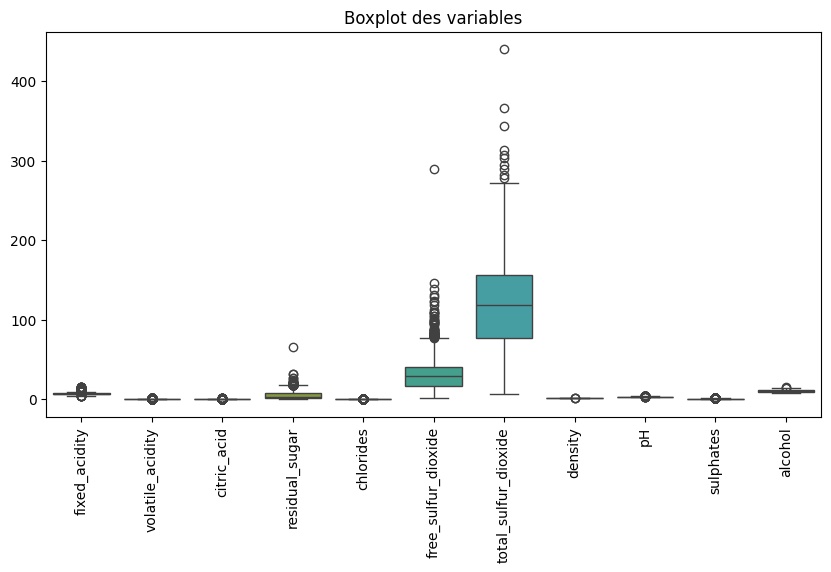

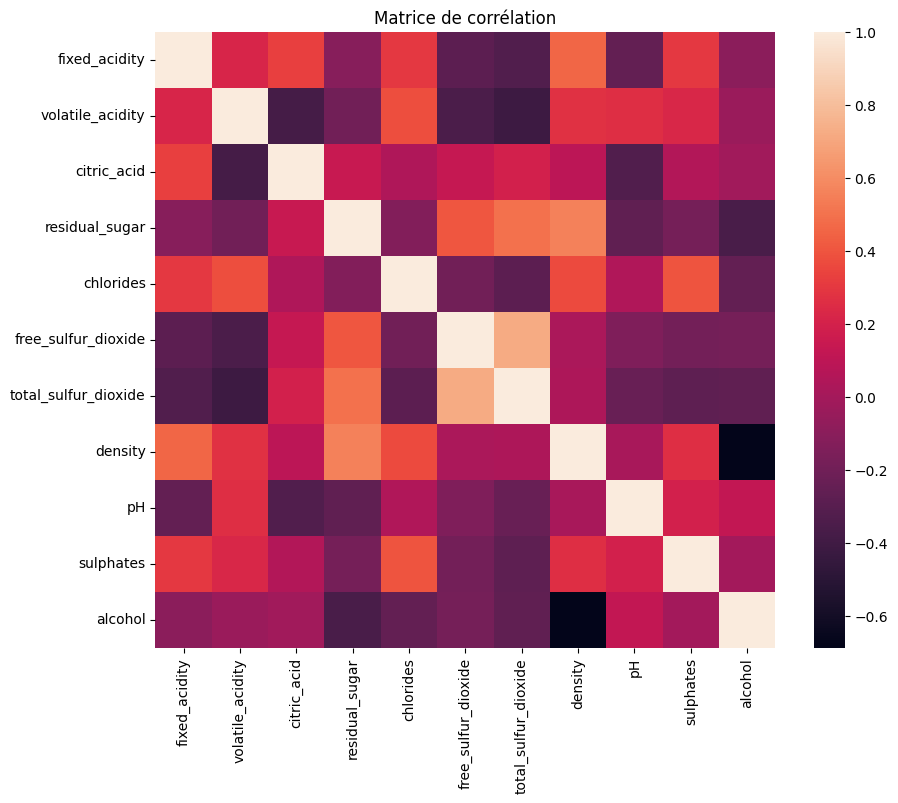

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.title("Boxplot des variables")
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), annot=False)
plt.title("Matrice de corrélation")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# 1/3 test
Xa, Xt, Ya, Yt = train_test_split(X, Y, test_size=1/3, shuffle=True, stratify=Y)

# 1/2 validation
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, test_size=0.5, shuffle=True, stratify=Ya)


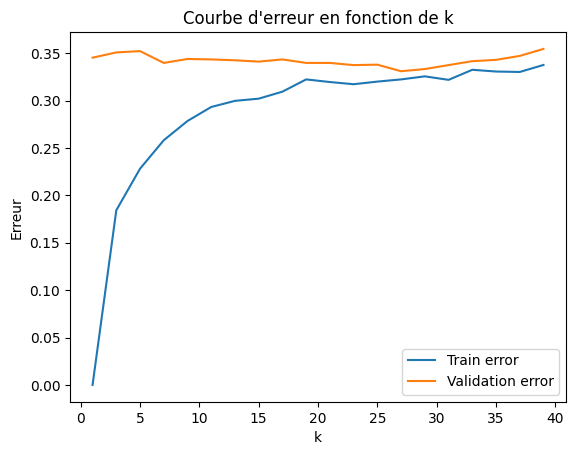

Meilleur k : 27


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_vector = np.arange(1, 40, 2)
error_train = []
error_val = []

for k in k_vector:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(Xa, Ya)

    Ypred_train = clf.predict(Xa)
    Ypred_val = clf.predict(Xv)

    error_train.append(1 - accuracy_score(Ya, Ypred_train))
    error_val.append(1 - accuracy_score(Yv, Ypred_val))

# Affichage
plt.figure()
plt.plot(k_vector, error_train, label="Train error")
plt.plot(k_vector, error_val, label="Validation error")
plt.xlabel("k")
plt.ylabel("Erreur")
plt.legend()
plt.title("Courbe d'erreur en fonction de k")
plt.show()

# Best k
best_idx = np.argmin(error_val)
k_star = k_vector[best_idx]
print("Meilleur k :", k_star)


In [ ]:
clf_best = KNeighborsClassifier(n_neighbors=k_star)
clf_best.fit(Xa, Ya)

Ypred_test = clf_best.predict(Xt)
error_test = 1 - accuracy_score(Yt, Ypred_test)

print("Erreur test avec k* =", k_star, " : ", error_test)


Erreur test avec k* = 27  :  0.3434903047091413


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(Xa)

Xa_n = sc.transform(Xa)
Xv_n = sc.transform(Xv)
Xt_n = sc.transform(Xt)
